In [10]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)


def tpr_tnr_from_labels(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    return tpr, tnr

def conf_mat(df, min_val = None):

    if not min_val:
        min_val = df[df['y_true'] == 1]['y_prob'].min()

    df['y_pred'] = df['y_prob'] >= min_val
    tpr, tnr = tpr_tnr_from_labels(df['y_true'], df['y_pred'])

    return {'tpr':tpr, 'tnr':tnr}

In [211]:
# 10 loops
all_loops = []

for i in range(6,11):
    df = pd.read_csv(f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_6789_test_{i}/helpful-sweep-260_{i}_predictions.csv")
    df['loop'] = i
    all_loops.append(df)

all_loops = pd.concat(all_loops)


# 10 loops - train on 6,7,8,9
train = all_loops[all_loops['loop'] < 10]
min_val = train[train['y_true'] == 1]['y_prob'].min()
print(min_val)
loop10preds = all_loops[all_loops['loop'] == 10]
print('total roc')
print(roc_auc_score(loop10preds['y_true'],loop10preds['y_prob']), conf_mat(loop10preds, min_val = min_val))



f = open("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/den_graph_data_list_9to10.json",'rb')
mapper = json.load(f)['mapping']

N = len(loop10preds)
mask = np.zeros(N, dtype = int)
mask[mapper] = 1
loop10preds['rung_rule'] = mask

rungloop10preds_rr = loop10preds[np.logical_not((loop10preds['rung_rule'] == 1) & (loop10preds['y_true'] == 1))]

print('without positive rr')
print(roc_auc_score(rungloop10preds_rr['y_true'],rungloop10preds_rr['y_prob']), conf_mat(rungloop10preds_rr, min_val = min_val))
# makes sense as we have removed a bunch of possible misclassified 1s.



rungloop10preds_rr = loop10preds[(loop10preds['rung_rule'] == 1)]

print('only rr')
print(roc_auc_score(rungloop10preds_rr['y_true'],rungloop10preds_rr['y_prob']), conf_mat(rungloop10preds_rr, min_val = min_val))
# makes sense as we have removed a bunch of possible misclassified 1s.


0.014444668
total roc
0.9697997488900569 {'tpr': 0.9753623471119521, 'tnr': 0.8105089764582455}
without positive rr
0.9599855046016487 {'tpr': 0.9912555468546072, 'tnr': 0.8105089764582455}
only rr
0.9698364772498439 {'tpr': 0.9725694364808146, 'tnr': 0.8100285726975291}


In [212]:
# 11 loops pos weights
all_loops = []

for i in range(6,12):
    df = pd.read_csv(f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_678910_test_{i}_pos_weight/radiant-sweep-270_{i}_predictions.csv")
    df['loop'] = i
    all_loops.append(df)

all_loops = pd.concat(all_loops)

# 10 loops - train on 6,7,8,9
train = all_loops[all_loops['loop'] < 11]
min_val = train[train['y_true'] == 1]['y_prob'].min()
print(min_val)
loop10preds = all_loops[all_loops['loop'] == 11]
print('total roc')
print(roc_auc_score(loop10preds['y_true'],loop10preds['y_prob']), conf_mat(loop10preds, min_val = min_val))



f = open("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/den_graph_data_list_10to11.json",'rb')
mapper = json.load(f)['mapping']

N = len(loop10preds)
mask = np.zeros(N, dtype = int)
mask[mapper] = 1
loop10preds['rung_rule'] = mask

rungloop10preds_rr = loop10preds[np.logical_not((loop10preds['rung_rule'] == 1) & (loop10preds['y_true'] == 1))]

print('without positive rr')
print(roc_auc_score(rungloop10preds_rr['y_true'],rungloop10preds_rr['y_prob']), conf_mat(rungloop10preds_rr, min_val = min_val))
# makes sense as we have removed a bunch of possible misclassified 1s.



rungloop10preds_rr = loop10preds[(loop10preds['rung_rule'] == 1)]

print('only rr')
print(roc_auc_score(rungloop10preds_rr['y_true'],rungloop10preds_rr['y_prob']), conf_mat(rungloop10preds_rr, min_val = min_val))
# makes sense as we have removed a bunch of possible misclassified 1s.


1.2881274e-06
total roc
0.9461082270424901 {'tpr': 0.9999877405658546, 'tnr': 0.2279682717614206}
without positive rr
0.96015136482059 {'tpr': 1.0, 'tnr': 0.2279682717614206}
only rr
nan {'tpr': 0.9999856666786111, 'tnr': nan}


/opt/miniconda3/envs/torch-env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/var/folders/4s/7f5zf8596_526pnhktn077f40000gn/T/ipykernel_7662/1154184778.py:15: RuntimeWarning: invalid value encountered in scalar divide
  tnr = tn / (tn + fp)


In [213]:
rr_11_12 = pd.read_parquet("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/den_graph_data_list_11to12.parquet")

In [214]:
import glob

file_order = np.sort(glob.glob("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/12loopfeats/*"))
mapp_eval2rr = {int(f.split('_')[-1].split('.')[0]): i + 1 for i,f in enumerate(file_order)}

In [215]:
mapp_eval2rr

{1: 1,
 10: 2,
 11: 3,
 12: 4,
 13: 5,
 14: 6,
 15: 7,
 16: 8,
 17: 9,
 18: 10,
 19: 11,
 2: 12,
 20: 13,
 3: 14,
 4: 15,
 5: 16,
 6: 17,
 7: 18,
 8: 19,
 9: 20}

In [235]:
new_data = []

for i in range(1, 21):
    temp = rr_11_12[rr_11_12['target_file_id'] == mapp_eval2rr[i]]

    temp['new_global_index'] = temp['target_row_in_file'].values + (mapp_eval2rr[i]-1)*1000000
    new_data.append(temp)
new_rung_rule = pd.concat(new_data)

In [236]:
new_rung_rule

,subset_index,target_global_index,target_file_id,target_row_in_file,new_global_index
0,13,2206,1,2206,2206
1,12,2207,1,2207,2207
2,88,2232,1,2232,2232
3,272,2264,1,2264,2264
4,340,2323,1,2323,2323
...,...,...,...,...,...
2021123,1268864,12998150,13,998150,12998150
2021124,1529772,12998153,13,998153,12998153
2021125,865823,12998154,13,998154,12998154
2021126,2556351,12998155,13,998155,12998155


In [239]:
# 12 loops pos weights
all_loops = []

for i in range(6,13):
    df = pd.read_csv(f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_67891011_test_{i}/gentle-sweep-293_{i}_predictions.csv")
    df['loop'] = i
    all_loops.append(df)

all_loops = pd.concat(all_loops)

# 10 loops - train on 6,7,8,9
train = all_loops[all_loops['loop'] < 12]
min_val = train[train['y_true'] == 1]['y_prob'].min()
loop10preds = all_loops[all_loops['loop'] == 12]

print('total roc')
print(roc_auc_score(loop10preds['y_true'],loop10preds['y_prob']), conf_mat(loop10preds, min_val = min_val))



#f = open("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/den_graph_data_list_11to12.json",'rb')
#mapper = json.load(f)['mapping']
mapper = new_rung_rule['new_global_index'].values
N = len(loop10preds)
mask = np.zeros(N, dtype = int)
mask[mapper] = 1
loop10preds['rung_rule'] = mask

rungloop10preds_rr = loop10preds[np.logical_not((loop10preds['rung_rule'] == 1) & (loop10preds['y_true'] == 1))]

print('without positive rr')
print(roc_auc_score(rungloop10preds_rr['y_true'],rungloop10preds_rr['y_prob']), conf_mat(rungloop10preds_rr, min_val = min_val))
# makes sense as we have removed a bunch of possible misclassified 1s.



rungloop10preds_rr = loop10preds[(loop10preds['rung_rule'] == 1)]

print('only rr')
print(roc_auc_score(rungloop10preds_rr['y_true'],rungloop10preds_rr['y_prob']), conf_mat(rungloop10preds_rr, min_val = min_val))
# makes sense as we have removed a bunch of possible misclassified 1s.


total roc
0.988489566230667 {'tpr': 0.999706046051411, 'tnr': 0.7957606470011663}
without positive rr
0.9889168863599496 {'tpr': 0.9997043844648423, 'tnr': 0.7957606470011663}
only rr
0.9860673047146734 {'tpr': 0.999711647806631, 'tnr': 0.7882730551279058}


In [79]:
all_loops = []

for i in range(6,13):
    df = pd.read_csv(f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_67891011_test_{i}/gentle-sweep-293_{i}_predictions.csv")
    df['loop'] = i
    all_loops.append(df)

all_loops = pd.concat(all_loops)

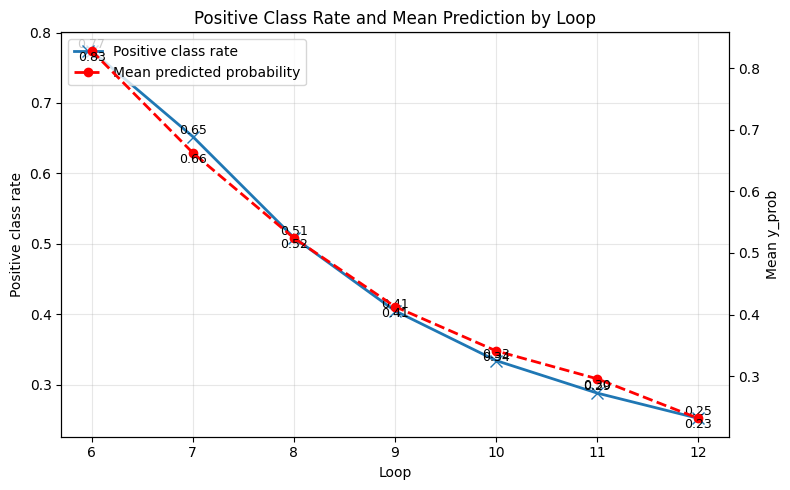

In [86]:
import matplotlib.pyplot as plt

# Left axis: positive class rate
rate_true = all_loops.groupby('loop')['y_true'].mean()

# Right axis: mean predicted probability
rate_prob = all_loops.groupby('loop')['y_prob'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# ---- Left axis ----
ax1.plot(
    rate_true.index,
    rate_true.values,
    marker='x',
    markersize=8,
    linewidth=2,
    label='Positive class rate'
)

# Annotate left axis
for x, y in zip(rate_true.index, rate_true.values):
    ax1.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

ax1.set_xlabel("Loop")
ax1.set_ylabel("Positive class rate")
ax1.grid(True, alpha=0.3)

# ---- Right axis ----
ax2 = ax1.twinx()

ax2.plot(
    rate_prob.index,
    rate_prob.values,
    marker='o',
    linestyle='--',
    color = 'red',
    linewidth=2,
    label='Mean predicted probability'
)

# Annotate right axis
for x, y in zip(rate_prob.index, rate_prob.values):
    ax2.text(x, y, f"{y:.2f}", ha='center', va='top', fontsize=9)

ax2.set_ylabel("Mean y_prob")

# ---- Legend ----
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("Positive Class Rate and Mean Prediction by Loop")
plt.tight_layout()
plt.show()


In [82]:
rate

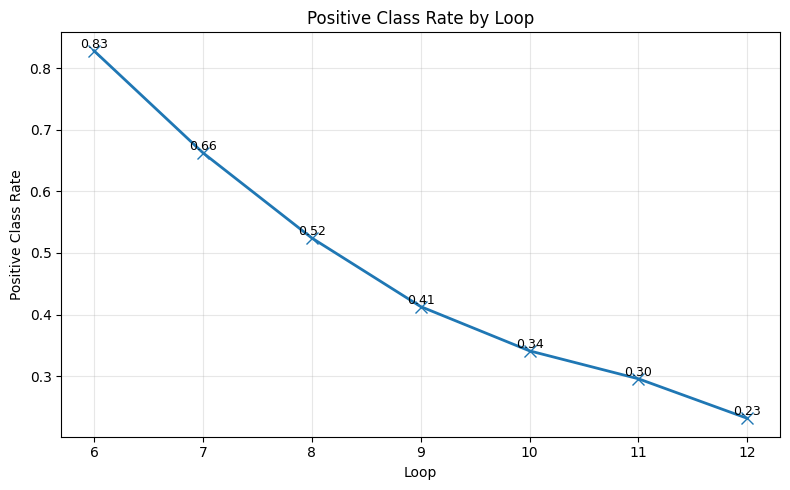

In [83]:
import matplotlib.pyplot as plt

# Compute mean target rate per loop
rate = all_loops.groupby('loop')['y_prob'].mean()

plt.figure(figsize=(8, 5))

plt.plot(
    rate.index,
    rate.values,
    marker='x',
    markersize=8,
    linewidth=2
)

# Annotate each point with its value
for x, y in zip(rate.index, rate.values):
    plt.text(
        x, y,
        f"{y:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xlabel("Loop")
plt.ylabel("Positive Class Rate")
plt.title("Positive Class Rate by Loop")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [305]:
# embedding and features.

# 10 loops
all_embeddings = []

for i in range(6,11):
    file = f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_6789_test_{i}/embeddings.npy"
    data = np.load(file)

    all_embeddings.append(data)

all_embeddings = np.concatenate(all_embeddings, axis = 0)


all_loops = []

for i in range(6,11):
    df = pd.read_csv(f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_6789_test_{i}/helpful-sweep-260_{i}_predictions.csv")
    df['loop'] = i
    all_loops.append(df)

all_loops = pd.concat(all_loops)
all_loops = all_loops.reset_index()
# 10 loops - train on 6,7,8,9
train = all_loops[all_loops['loop'] < 10]
min_val = train[train['y_true'] == 1]['y_prob'].min()
print(min_val)
loop10preds = all_loops[all_loops['loop'] == 10]
print('total roc')
print(roc_auc_score(loop10preds['y_true'],loop10preds['y_prob']), conf_mat(loop10preds, min_val = min_val))



f = open("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/den_graph_data_list_9to10.json",'rb')
mapper = json.load(f)['mapping']

N = len(loop10preds)
mask = np.zeros(N, dtype = int)
mask[mapper] = 1
loop10preds['rung_rule'] = mask


0.014444668
total roc
0.9697997488900569 {'tpr': 0.9753623471119521, 'tnr': 0.8105089764582455}


In [ ]:
from tqdm import tqdm

Explained variance (50D): 0.99999994


100%|██████████| 19/19 [00:04<00:00,  4.23it/s]

Best k: 2


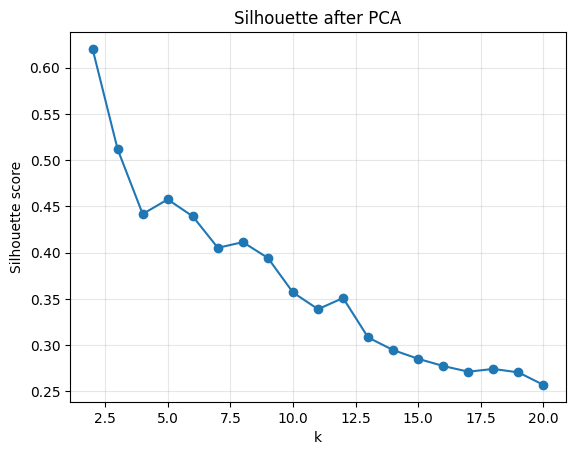

In [276]:
import numpy as np

X = loop10embeddings  # shape: (n_samples, n_features)
from sklearn.decomposition import PCA

pca_pre = PCA(n_components=100, random_state=42)
X_pca50 = pca_pre.fit_transform(X)

print("Explained variance (50D):",
      pca_pre.explained_variance_ratio_.sum())

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

k_range = range(2, 21)
sil_scores = []

for k in tqdm(k_range):
    km = MiniBatchKMeans(
        n_clusters=k,
        n_init=3,
        batch_size=1024,
        random_state=42
    )
    labels = km.fit_predict(X_pca50)

    sil = silhouette_score(
        X_pca50,
        labels,
        sample_size=3000,
        random_state=42
    )
    sil_scores.append(sil)

best_k = k_range[np.argmax(sil_scores)]
print("Best k:", best_k)

import matplotlib.pyplot as plt

plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette after PCA")
plt.grid(alpha=0.3)
plt.show()


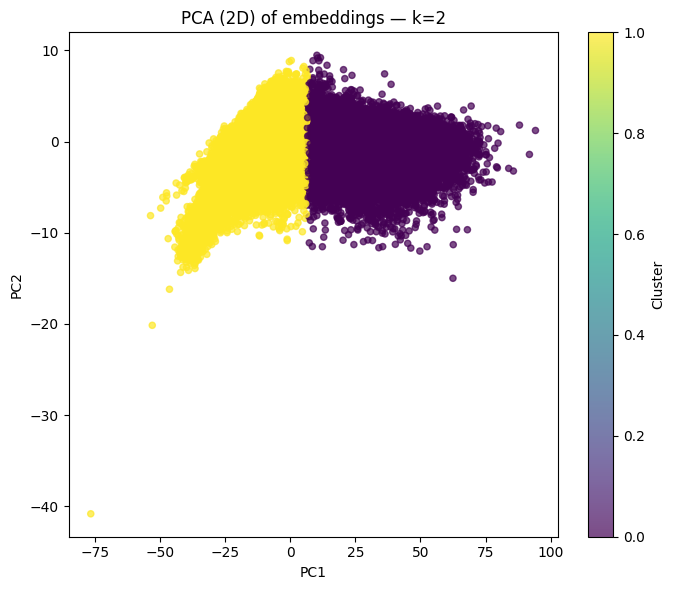

In [298]:
best_k = 2
kmeans = MiniBatchKMeans(
    n_clusters=best_k,
    n_init=10,
    batch_size=2048,
    random_state=42
)

cluster_labels = kmeans.fit_predict(X_pca50)

from sklearn.decomposition import PCA


pca_2d = PCA(n_components=2, random_state=42)
X_pca2 = pca_2d.fit_transform(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sc2 = plt.scatter(
    X_pca2[:, 0],
    X_pca2[:, 1],
    c=cluster_labels,
    s=20,
    alpha=0.7
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA (2D) of embeddings — k={best_k}")
plt.colorbar(sc2, label="Cluster")
plt.tight_layout()
plt.show()


In [312]:
features = pd.read_csv("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/Tree_classifier_for_graphs/new_stuff/features/merged/new2_merged/10loops_merged.csv")
motif_features = features.columns[['motif' in x.lower() for x in features.columns]]
features['rung_rule'] = loop10preds['rung_rule'].values

In [340]:
motif_global_features = motif_features.values.tolist()

In [364]:
feats_rung1 = features[(features['rung_rule'] == 1) & (features['COEFFICIENTS'] == 1)]
feats_rung0 = features[(features['rung_rule'] == 0) & (features['COEFFICIENTS'] == 1)]

In [365]:
len(motif_global_features)

86

In [366]:
import numpy as np
from scipy.stats import ks_2samp

ks_stats = []
for x in motif_global_features:
    xx = feats_rung1[x]      
    y = feats_rung0[x]       

    ks_stat, p_value = ks_2samp(xx, y)
    ks_stats.append(ks_stat)

In [367]:
feature_imp = pd.DataFrame({'features':motif_global_features, 'ks_stats':ks_stats})
feature_imp = feature_imp.sort_values('ks_stats')[::-1]
res = feature_imp[feature_imp['ks_stats'] > np.percentile(feature_imp['ks_stats'],90)]
res

,features,ks_stats
2,Motif_4_cycles,0.687614
3,Motif_4_cycles_per_Cn4,0.687614
32,Motif_5_cycles_per_Kn,0.618856
31,Motif_5_cycles_per_Cn5,0.618856
30,Motif_5_cycles,0.618856
20,Motif_triangle_edge_incidence_mean,0.571540
25,Motif_triangles_per_Cn3,0.571357
24,Motif_triangles,0.571357
18,Motif_triangle_edge_frac_ge2,0.571091


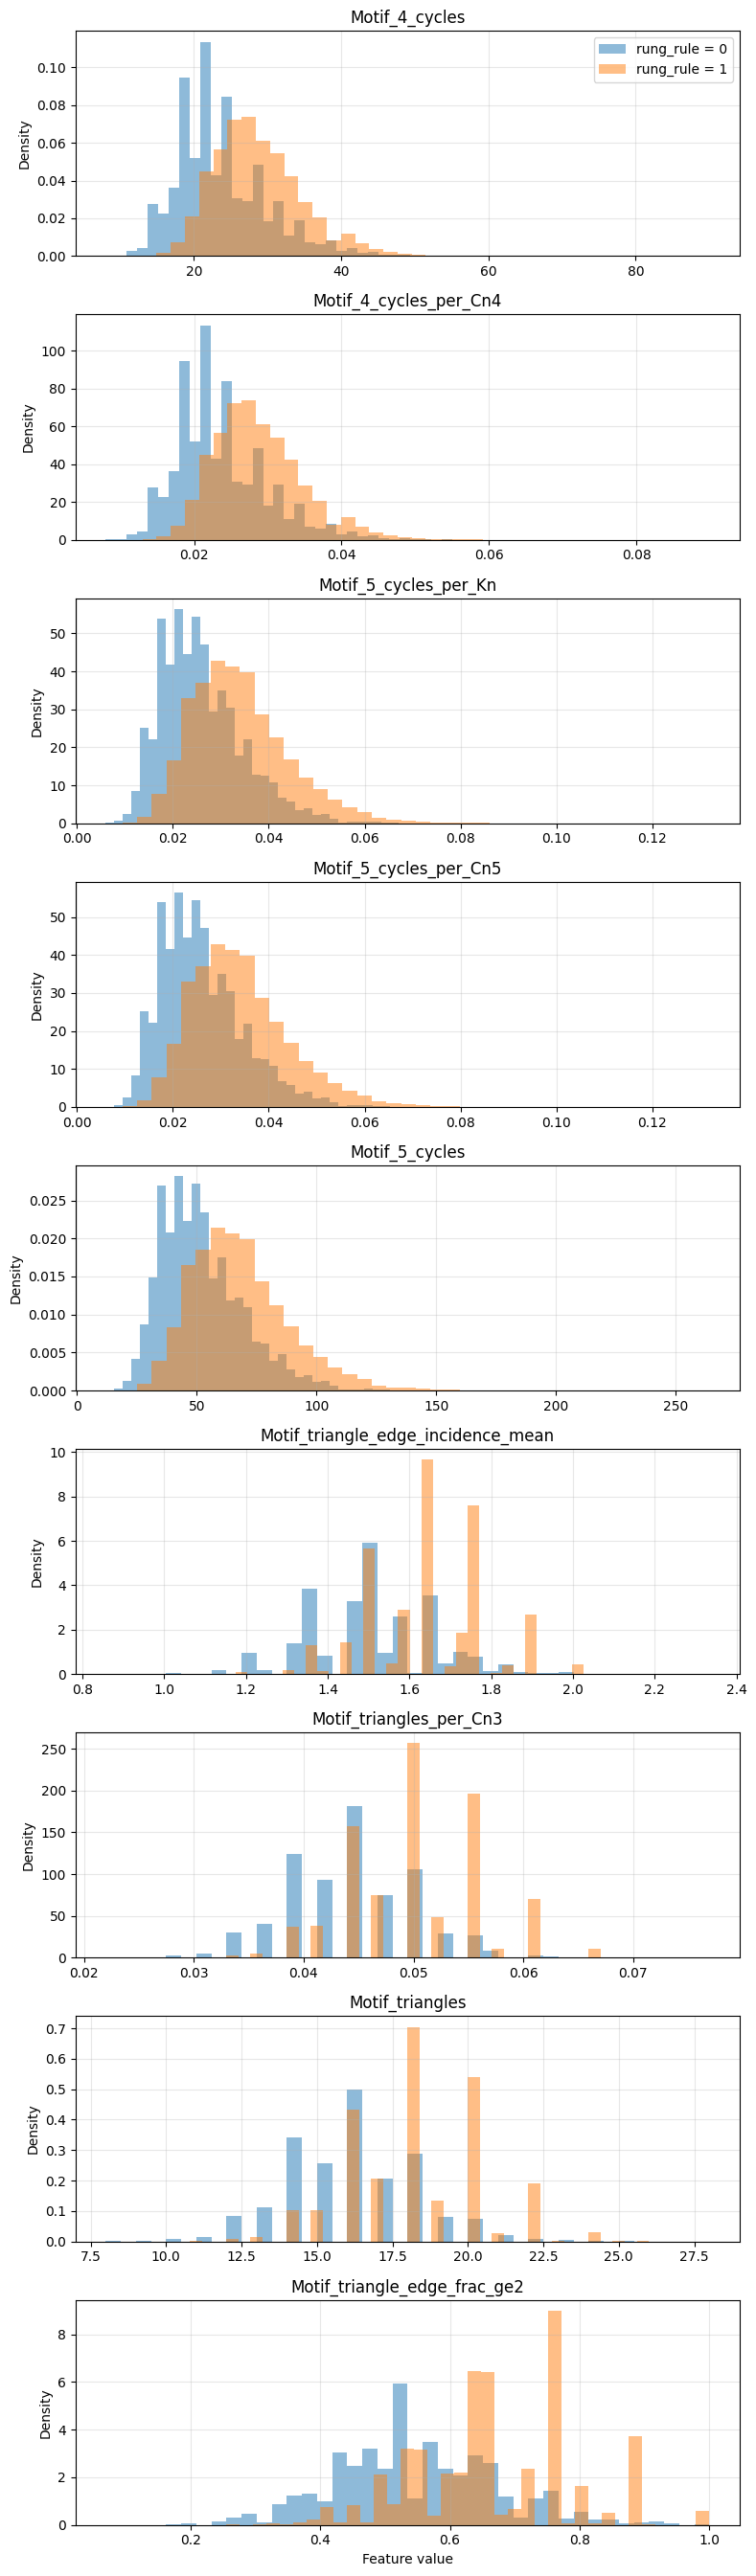

In [368]:
features_to_plot = res['features'].values.tolist()

temp = features[features_to_plot + ["rung_rule"]]


import matplotlib.pyplot as plt

rungs = sorted(temp['rung_rule'].unique())
n_feat = len(features_to_plot)

fig, axes = plt.subplots(
    n_feat, 1,
    figsize=(8, 3 * n_feat),
    sharex=False
)

if n_feat == 1:
    axes = [axes]

for ax, feat in zip(axes, features_to_plot):
    for rr in rungs:
        vals = temp.loc[temp['rung_rule'] == rr, feat]
        ax.hist(
            vals,
            bins=40,
            alpha=0.5,
            density=True,
            label=f"rung_rule = {rr}"
        )

    ax.set_title(feat)
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)

axes[-1].set_xlabel("Feature value")
axes[0].legend()

plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import roc_auc_score

In [11]:
# 11 loops pos weights
all_loops = []

for i in range(6,12):
    df = pd.read_csv(f"/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/embeddings/train_678910_test_{i}_pos_weight/radiant-sweep-270_{i}_predictions.csv")
    df['loop'] = i
    all_loops.append(df)

all_loops = pd.concat(all_loops)

# 10 loops - train on 6,7,8,9
train = all_loops[all_loops['loop'] < 11]
min_val = train[train['y_true'] == 1]['y_prob'].min()
print(min_val)
loop10preds = all_loops[all_loops['loop'] == 11]
print('total roc')
print(roc_auc_score(loop10preds['y_true'],loop10preds['y_prob']), conf_mat(loop10preds, min_val = min_val))



f = open("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/GNN/data/den_graph_data_list_10to11.json",'rb')
mapper = json.load(f)['mapping']

N = len(loop10preds)
mask = np.zeros(N, dtype = int)
mask[mapper] = 1
loop10preds['rung_rule'] = mask


1.2881274e-06
total roc
0.9461082270424901 {'tpr': 0.9999877405658546, 'tnr': 0.2279682717614206}


In [17]:
motif_features = [
    col for col in features.columns
    if "motif" in col.lower()
]


In [12]:
import polars as pl

# Read CSV
features = pl.read_csv(
    "/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/Tree_classifier_for_graphs/new_stuff/features/merged/new2_merged/11loops_merged.csv"
)

# Select motif feature columns
motif_features = [
    col for col in features.columns
    if "motif" in col.lower()
]

# Add rung_rule column (length MUST match)
features = features.with_columns(
    pl.Series("rung_rule", loop10preds["rung_rule"].to_numpy())
)


In [14]:
import polars as pl

feats_rung1 = features.filter(
    (pl.col("rung_rule") == 1) &
    (pl.col("COEFFICIENTS") == 1)
)

feats_rung0 = features.filter(
    (pl.col("rung_rule") == 0) &
    (pl.col("COEFFICIENTS") == 1)
)


In [19]:
import numpy as np
from scipy.stats import ks_2samp

ks_stats = []

for col in motif_features:
    x1 = feats_rung1.select(col).to_numpy().ravel()
    x0 = feats_rung0.select(col).to_numpy().ravel()

    ks_stat, p_value = ks_2samp(x1, x0)
    ks_stats.append(ks_stat)


In [21]:
feature_imp = pd.DataFrame({'features':motif_features, 'ks_stats':ks_stats})
feature_imp = feature_imp.sort_values('ks_stats')[::-1]
res = feature_imp[feature_imp['ks_stats'] > np.percentile(feature_imp['ks_stats'],90)]
res

,features,ks_stats
81,Motif_induced_g_4_4_per_Cn4,0.274231
80,Motif_induced_g_4_4,0.274231
75,Motif_induced_g_1_4_per_Cn4,0.270979
74,Motif_induced_g_1_4,0.270979
58,Motif_induced5_g_2_5_per_Cn5,0.240687
57,Motif_induced5_g_2_5,0.240687
79,Motif_induced_g_3_4_per_Cn4,0.235730
78,Motif_induced_g_3_4,0.235730
73,Motif_induced_connected_per_5set,0.219607


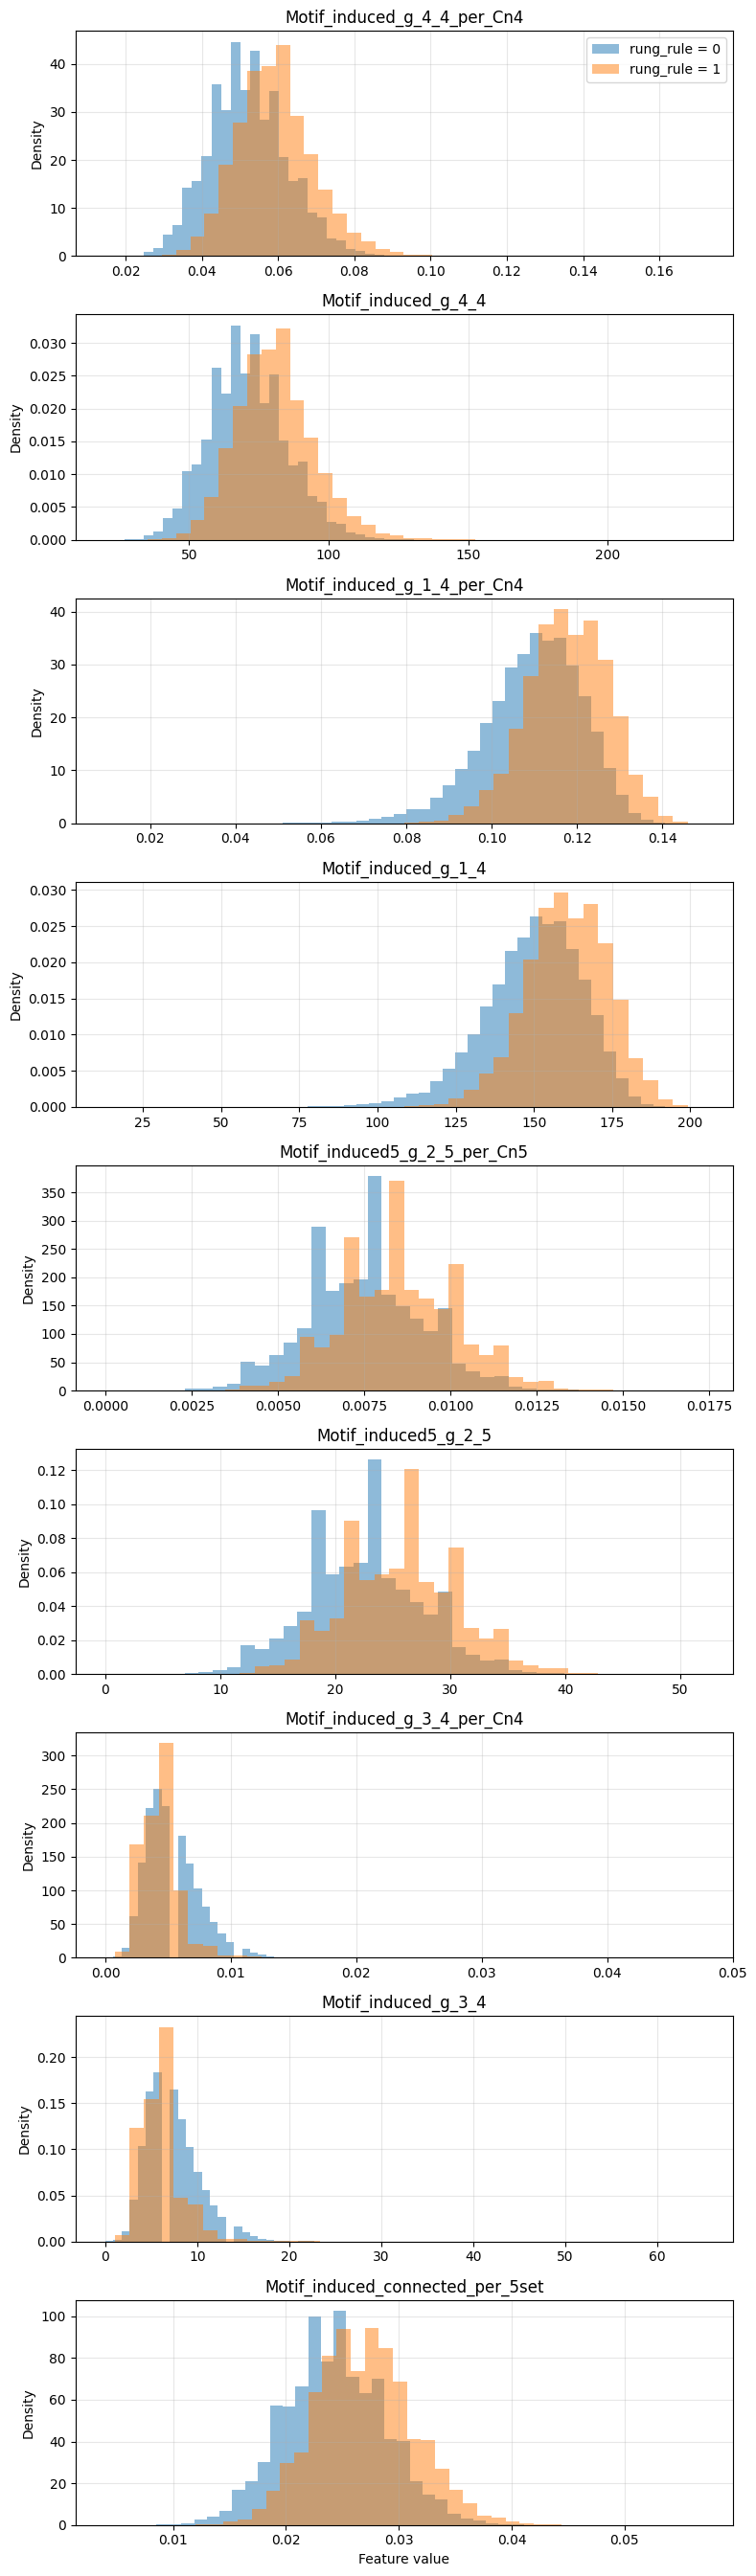

In [27]:
import matplotlib.pyplot as plt
import numpy as np

features_to_plot = res['features'].values.tolist()
temp = features.select(features_to_plot + ["rung_rule"])

rungs = sorted(temp.select("rung_rule").unique().to_series().to_list())
n_feat = len(features_to_plot)

fig, axes = plt.subplots(
    n_feat, 1,
    figsize=(8, 3 * n_feat),
    sharex=False
)

if n_feat == 1:
    axes = [axes]

for ax, feat in zip(axes, features_to_plot):
    for rr in rungs:
        vals = (
            temp
            .filter(pl.col("rung_rule") == rr)
            .select(feat)
            .to_numpy()
            .ravel()
        )

        ax.hist(
            vals,
            bins=40,
            alpha=0.5,
            density=True,
            label=f"rung_rule = {rr}"
        )

    ax.set_title(feat)
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)

axes[-1].set_xlabel("Feature value")
axes[0].legend()

plt.tight_layout()
plt.show()


In [ ]:
# are the embeddings capturing this difference.